# Experiment 2: Document at various level for small dataset(COVID-science:non-science)

## 1. Article level

In the file each article is seperated by 'NEW_PAPER' in 'covid-scienc.txt' and 'NEW NEWSPAPER' in 
'covid-non-science'.

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx
import mantel

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### covid-science-small.txt

In [2]:
def load_data(path,file_name,seperator):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r", encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == seperator:
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list,titles,word_count_science=load_data("","covid-science-small.txt",'NEW_PAPER')

Number of words in text file : 59691
Total Number of Documents: 10


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>4]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnetmethodology', 'predicting', 'covid', '19based', 'chest', 'imagess', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herreraabstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'orchest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'mostmedical', 'centers', 'hence', 'cases', 'imagesbecome', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networkshave', 'great', 'potential', 'building', 'covid', 'triage', 'systemsand', 'detecting', 'covid', 'patients', 'especially', 'patients', 'withlow', 'severity', 'unfortunately', 'current', 'databases', 'allowbuilding', 'systems', 'highly', 'heterogeneousand', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensit

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics=10
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_covid_science =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
dict(model_science.show_topic(0, topn=5))

{'covid': 0.4680298864439314,
 'model': 0.33198252628296554,
 'imag': 0.3267157192360426,
 'class': 0.20559425407282692,
 'dataset': 0.15776417661740802}

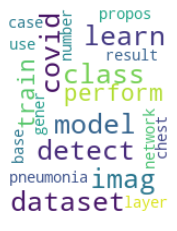

In [10]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph6.png')

In [11]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled6.png')

cosine-similarity
            covid      model      imag     class    dataset
covid           1   0.276431  0.526791  0.696117   0.764792
model    0.276431          1 -0.242246 -0.040174  0.0536525
imag     0.526791  -0.242246         1  0.438891   0.285846
class    0.696117  -0.040174  0.438891         1    0.83488
dataset  0.764792  0.0536525  0.285846   0.83488          1


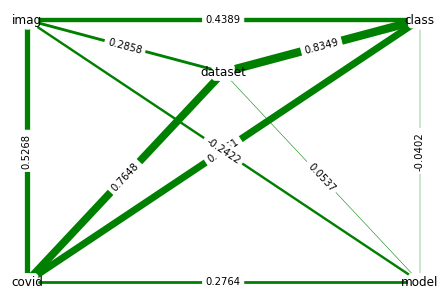

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig6.png')

### covid-non-science-small.txt

In [13]:
document_list,titles,word_count_nscience=load_data("","covid-non-science-small.txt",'NEW NEWSPAPER')

Number of words in text file : 5231
Total Number of Documents: 10


In [14]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'realityby', 'reuterspublished', 'updated', '2020by', 'joneslondon', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 

In [15]:
# LSA Model
number_of_topics=10
words=word_count_nscience
model_nscience=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model_nscience.show_topic(0, topn=words))#dict and encoding matrix values


In [16]:
dict(model_nscience.show_topic(0,topn=5))

{'test': 0.6105961140643036,
 'peopl': 0.310728710041002,
 'covid': 0.25119870827829116,
 'symptom': 0.23022371656243668,
 'fever': 0.17811639545747052}

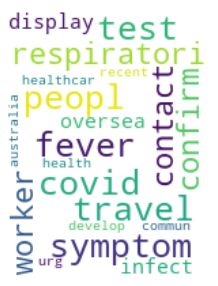

In [17]:
from wordcloud import WordCloud
text = dict(model_nscience.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph7.png')

In [18]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_non_science =dict(model_nscience.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_nscience.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled7.png')

cosine-similarity
             test     peopl      covid   symptom      fever
test            1   0.84355   0.226253  0.943014   0.924514
peopl     0.84355         1   0.210345  0.906806    0.91429
covid    0.226253  0.210345          1  0.032713  0.0207055
symptom  0.943014  0.906806   0.032713         1   0.992474
fever    0.924514   0.91429  0.0207055  0.992474          1


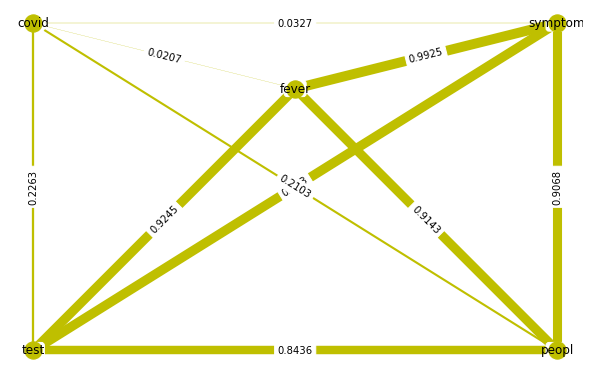

In [19]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="y")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig7.png')

### covid-psychology-small.txt

In [20]:
document_list,titles,word_count_psy=load_data("","covid-psychology-SMALL.txt",'NEW PAPER')

Number of words in text file : 39735
Total Number of Documents: 10


In [21]:
clean_text=preprocess_data(document_list)

['international', 'sociology2021', 'author', '2020article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissionsdoi', '0268580920948807journals', 'sagepub', 'isspsychology', 'politics', 'ofcovid', 'misinfodemics', 'peoplebelieve', 'misinfodemics', 'sonia', 'mukhtaruniversity', 'management', 'technology', 'lahore', 'pakistanabstractmisinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adversehealth', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicateevidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'ofmisinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevierabout', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'thisreview', 'examines', 'mechanisms', 'operational', 'structure', 'prevalence', 'pr

In [22]:
# LSA Model
number_of_topics=10
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))#dict and encoding matrix values


In [23]:
dict(model_psy.show_topic(0,topn=5))

{'covid': 0.41992720259455585,
 'psycholog': 0.2869498650487286,
 'pandem': 0.24145037935802607,
 'impact': 0.21712822111271343,
 'health': 0.1983503305006993}

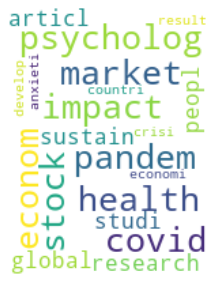

In [24]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph27.png')

In [25]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled8.png')

cosine-similarity
              covid psycholog    pandem    impact    health
covid             1  0.515819  0.504336  0.600935  0.700286
psycholog  0.515819         1  0.424529  0.309454   0.15666
pandem     0.504336  0.424529         1  0.691884  0.582984
impact     0.600935  0.309454  0.691884         1  0.461942
health     0.700286   0.15666  0.582984  0.461942         1


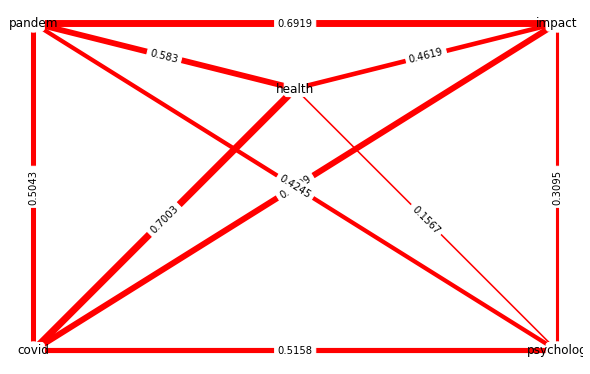

In [26]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig8.png')

In [27]:
def mantel_test():
    words_science = dict(model_science.show_topic(0, topn=word_count_science))
    words_psy = dict(model_psy.show_topic(0, topn=word_count_psy))

    top_words_science = dict(model_science.show_topic(0, topn=5)) 
    top_words_psy = dict(model_psy.show_topic(0,topn=5)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_psy[key]
        except KeyError:
            c[key] = 0

    top_words_psy.update(c)

    b={} #non law words in law
    for key in top_words_psy:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_science.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_psy =dict(model_psy.show_topic(i, topn=word_count_psy))
        b=pd.DataFrame(words_from_psy,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_psy.keys()), 
                      index = list(top_words_psy.keys()))

    l = list(top_words_psy.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_psy), k = 1)])

    return mantel.test(dist1, dist2, perms=100000, method='pearson', tail='upper')

In [28]:
mantel_test()

Pairwise-distance
              covid    psycholog       pandem     impact     health  \
covid             0     0.511754     0.518547    0.49196    0.48163   
psycholog  0.511754  8.23181e-11      0.19255   0.058449  0.0771825   
pandem     0.518547      0.19255  3.72529e-09   0.216864   0.172403   
impact      0.49196     0.058449     0.216864          0  0.0682665   
health      0.48163    0.0771825     0.172403  0.0682665          0   
model      0.722682     0.671234     0.670621   0.678256   0.664499   
imag       0.523342     0.560421     0.622579   0.563451   0.575843   
class      0.369951     0.396943     0.494773    0.38067    0.39581   
dataset    0.346892      0.28572     0.355768   0.280311   0.277452   

                 model         imag     class   dataset  
covid         0.722682     0.523342  0.369951  0.346892  
psycholog     0.671234     0.560421  0.396943   0.28572  
pandem        0.670621     0.622579  0.494773  0.355768  
impact        0.678256     0.563451   0

(-0.3188139799122745, 0.87864, -1.2032276255231216)

In [29]:
def mantel_test_n():
    words_science = dict(model_science.show_topic(0, topn=word_count_science))
    words_nscience = dict(model_nscience.show_topic(0, topn=word_count_nscience))

    top_words_science = dict(model_science.show_topic(0, topn=5)) 
    top_words_nscience = dict(model_nscience.show_topic(0,topn=5)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_nscience[key]
        except KeyError:
            c[key] = 0

    top_words_nscience.update(c)

    b={} 
    for key in top_words_nscience:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance 
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_science.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_nscience =dict(model_nscience.show_topic(i, topn=word_count_nscience))
        b=pd.DataFrame(words_from_nscience,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_nscience.keys()), 
                      index = list(top_words_nscience.keys()))

    l = list(top_words_nscience.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_nscience), k = 1)])

    return mantel.test(dist1, dist2, perms=100000, method='pearson', tail='upper')

In [30]:
mantel_test_n()

Pairwise-distance
                test     peopl     covid      symptom      fever        model  \
test     7.45058e-09  0.253664  0.574067     0.410115   0.410058     0.812243   
peopl       0.253664         0  0.517102     0.183858   0.190524     0.700073   
covid       0.574067  0.517102         0     0.511716   0.512684     0.722682   
symptom     0.410115  0.183858  0.511716  3.29272e-10  0.0221086     0.670779   
fever       0.410058  0.190524  0.512684    0.0221086          0     0.673876   
model       0.812243  0.700073  0.722682     0.670779   0.673876  1.05367e-08   
imag        0.707031  0.641629  0.523342     0.560838    0.55381     0.972454   
class       0.586931  0.452663  0.369951     0.393137   0.399178      0.79287   
dataset     0.412221  0.273837  0.346892     0.280019   0.288068     0.714484   

                imag     class   dataset  
test        0.707031  0.586931  0.412221  
peopl       0.641629  0.452663  0.273837  
covid       0.523342  0.369951  0.346892  

(0.16347256613000766, 0.3088, 0.585658166453597)

## 2. 2-3 paragraphs

### covid-science-small.txt

In [31]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r",encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [32]:
document_list,titles,word_count_science=load_data("","covid-science-small.txt")

Number of words in text file : 59691
Total Number of Documents: 2


In [33]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet', 'methodology', 'predicting', 'covid', 'based', 'chest', 'images', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herrera', 'abstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'chest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'medical', 'centers', 'hence', 'cases', 'images', 'become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks', 'great', 'potential', 'building', 'covid', 'triage', 'systems', 'detecting', 'covid', 'patients', 'especially', 'patients', 'severity', 'unfortunately', 'current', 'databases', 'allow', 'building', 'systems', 'highly', 'heterogeneous', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensitivities', 'ach

In [34]:
# LSA Model
number_of_topics=2
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_science =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [35]:
dict(model_science.show_topic(0, topn=5))

{'support': 0.32899471788278895,
 'granada': 0.2481403720903726,
 'covid': 0.2276958139915435,
 'research': 0.21932981192185938,
 'programm': 0.21932981192185938}

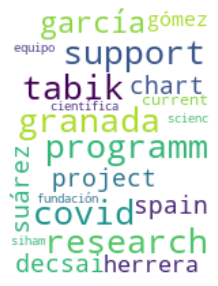

In [36]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph8.png')

In [37]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled9.png')

cosine-similarity
            support   granada      covid   research   programm
support           1  0.956969 -0.0794645          1          1
granada    0.956969         1   0.213226   0.956969   0.956969
covid    -0.0794645  0.213226          1 -0.0794645 -0.0794645
research          1  0.956969 -0.0794645          1          1
programm          1  0.956969 -0.0794645          1          1


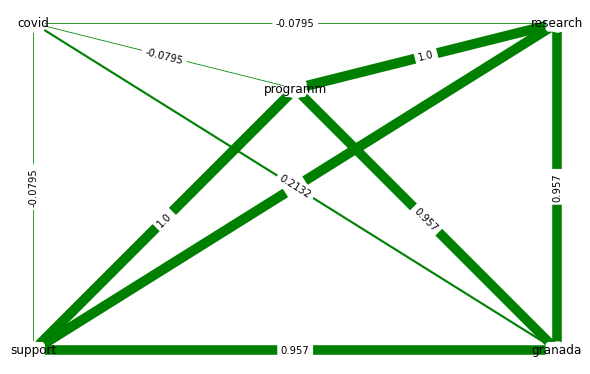

In [38]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig9.png')

### covid-non-science-small.txt

In [39]:
document_list,titles,word_count_nscience=load_data("","covid-non-science-small.txt")

Number of words in text file : 5231
Total Number of Documents: 2


In [40]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality', 'reuters', 'published', 'updated', 'jones', 'london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 'fea

In [41]:
# LSA Model
number_of_topics=2
words=word_count_nscience
model_nscience=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model_nscience.show_topic(0, topn=words))##dict and encoding matrix values

In [42]:
dict(model_nscience.show_topic(0, topn=5))

{'market': 0.29865735592426446,
 'covid': 0.2197986796193412,
 'friday': 0.18596179123202242,
 'infect': 0.1521249028447039,
 'copper': 0.1465324530795612}

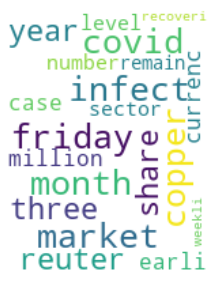

In [43]:
from wordcloud import WordCloud
text = dict(model_nscience.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph9.png')

In [44]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_non_science =dict(model_nscience.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_nscience.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled10.png')

cosine-similarity
          market     covid    friday    infect    copper
market         1  0.741138  0.986861  0.813347  0.741138
covid   0.741138         1  0.839872  0.212223         1
friday  0.986861  0.839872         1  0.708661  0.839872
infect  0.813347  0.212223  0.708661         1  0.212223
copper  0.741138         1  0.839872  0.212223         1


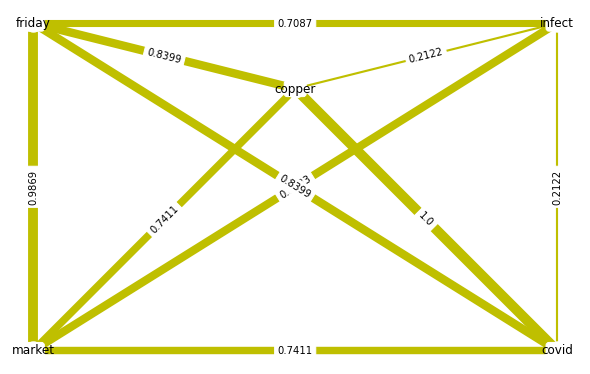

In [45]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig10.png')

### covid-psychology-small.txt

In [46]:
document_list,titles,word_count_psy=load_data("","covid-psychology-small.txt")

Number of words in text file : 39735
Total Number of Documents: 2


In [47]:
clean_text=preprocess_data(document_list)

['international', 'sociology', 'author', 'article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissions', '0268580920948807', 'journals', 'sagepub', 'psychology', 'politics', 'covid', 'misinfodemics', 'people', 'believe', 'misinfodemics', 'sonia', 'mukhtar', 'university', 'management', 'technology', 'lahore', 'pakistan', 'abstract', 'misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse', 'health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate', 'evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier', 'about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'review', 'examines', 'mechanisms', 'operational', 'structure', 'preval

In [48]:
# LSA Model
number_of_topics=2
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))##dict and encoding matrix values

In [49]:
dict(model_psy.show_topic(0, topn=5))

{'misinfodem': 0.5033743541941366,
 'covid': 0.3629711503323511,
 'articl': 0.21459251935197396,
 'mechan': 0.14837863098037715,
 'health': 0.14837863098037704}

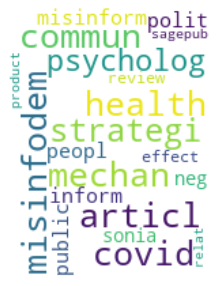

In [50]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph28.png')

In [51]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled11.png')

cosine-similarity
           misinfodem     covid    articl    mechan    health
misinfodem          1  0.976353  0.993795  0.755596  0.755596
covid        0.976353         1  0.946251  0.879335  0.879335
articl       0.993795  0.946251         1  0.678051  0.678051
mechan       0.755596  0.879335  0.678051         1         1
health       0.755596  0.879335  0.678051         1         1


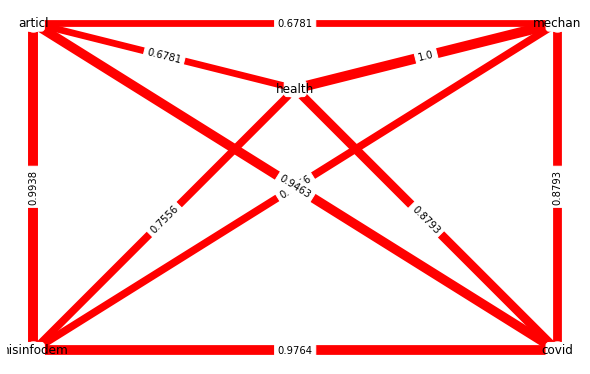

In [52]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig11.png')

In [53]:
mantel_test()

Pairwise-distance
           misinfodem     covid       articl mechan health   support  \
misinfodem          0         0            0      0      0         0   
covid               0         0     0.378443      0      0  0.628979   
articl              0  0.378443  1.31709e-09      0      0  0.423546   
mechan              0         0            0      0      0         0   
health              0         0            0      0      0         0   
support             0  0.628979     0.423546      0      0         0   
granada             0   0.47364     0.266413      0      0  0.168269   
research            0  0.545218     0.293443      0      0  0.133207   
programm            0  0.545218     0.293443      0      0  0.133207   

              granada   research   programm  
misinfodem          0          0          0  
covid         0.47364   0.545218   0.545218  
articl       0.266413   0.293443   0.293443  
mechan              0          0          0  
health              0          

(-0.12443276831416944, 0.65459, -0.5150177827525801)

In [54]:
mantel_test_n()

Pairwise-distance
         market     covid friday infect copper   support    granada  \
market        0         0      0      0      0         0          0   
covid         0         0      0      0      0  0.628979    0.47364   
friday        0         0      0      0      0         0          0   
infect        0         0      0      0      0         0          0   
copper        0         0      0      0      0         0          0   
support       0  0.628979      0      0      0         0   0.168269   
granada       0   0.47364      0      0      0  0.168269          0   
research      0  0.545218      0      0      0  0.133207  0.0775087   
programm      0  0.545218      0      0      0  0.133207  0.0775087   

           research   programm  
market            0          0  
covid      0.545218   0.545218  
friday            0          0  
infect            0          0  
copper            0          0  
support    0.133207   0.133207  
granada   0.0775087  0.0775087  
researc

(-0.2556973616684301, 1.0, -1.1313194383674046)

## Paragraph level

### covid-science-small.txt

In [55]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding='UTF8') as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [56]:
document_list,titles,word_count_science=load_data("","covid-science-small.txt")

Number of words in text file : 59691
Total Number of Documents: 7401


In [57]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet']
['methodology', 'predicting', 'covid']
['based', 'chest', 'images']
['tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte']
['guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova']
['olmedo', 'sánchez', 'herrera']
['abstract', 'currently', 'coronavirus', 'disease', 'covid']
['infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans']
['chest', 'images', 'computed', 'tomography']
['scanners', 'testing', 'available']
['medical', 'centers', 'hence', 'cases', 'images']
['become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks']
['great', 'potential', 'building', 'covid', 'triage', 'systems']
['detecting', 'covid', 'patients', 'especially', 'patients']
['severity', 'unfortunately', 'current', 'databases', 'allow']
['building', 'systems', 'highly', 'heterogeneous']
['biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sens

In [58]:
# LSA Model
number_of_topics=10
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [59]:
dict(model_science.show_topic(0, topn=5))

{'covid': 0.7920433874011976,
 'model': 0.29539922487836656,
 'imag': 0.27447025649836876,
 'detect': 0.16371078058584082,
 'class': 0.12956239660015573}

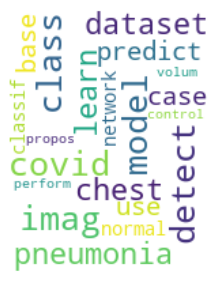

In [60]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph10.png')

In [61]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled12.png')

cosine-similarity
              covid        model        imag     detect        class
covid             1 -9.84991e-05  -0.0464931   0.529863   0.00840154
model  -9.84991e-05            1 -0.00576668 -0.0060811 -0.000340492
imag     -0.0464931  -0.00576668           1   0.166221  -0.00167196
detect     0.529863   -0.0060811    0.166221          1    -0.355849
class    0.00840154 -0.000340492 -0.00167196  -0.355849            1


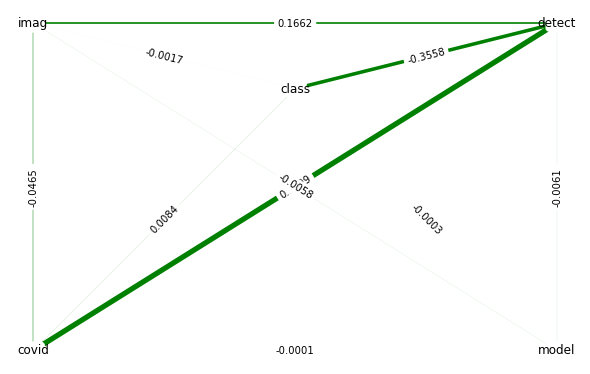

In [62]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig12.png')

### covid-non-science-small.txt

In [63]:
document_list,titles,word_count_nscience=load_data("","covid-non-science-small.txt")

Number of words in text file : 5231
Total Number of Documents: 229


In [64]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality']
['reuters']
['published', 'updated']
['jones']
['london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves']
['market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained']
['chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise']
['currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday']
['think', 'infection', 'rate

In [65]:
# LSA Model
number_of_topics=10
words=word_count_nscience
model_nscience=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model_nscience.show_topic(0, topn=words))##dict and encoding matrix values

In [66]:
dict(model_nscience.show_topic(0, topn=5))

{'trial': -0.46733370952346287,
 'vaccin': -0.37894974064522136,
 'stage': -0.33285469564971976,
 'expect': -0.23326951645218838,
 'underway': -0.20015569158061586}

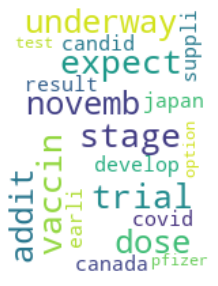

In [67]:
from wordcloud import WordCloud
text = dict(model_nscience.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph11.png')

In [68]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_non_science =dict(model_nscience.show_topic(i, topn=words))
    b=pd.DataFrame(words_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_nscience.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled13.png')

cosine-similarity
             trial    vaccin     stage    expect  underway
trial            1  0.642127  0.999748  0.998301  0.988222
vaccin    0.642127         1  0.632528  0.633807   0.68012
stage     0.999748  0.632528         1  0.998209  0.988785
expect    0.998301  0.633807  0.998209         1  0.987791
underway  0.988222   0.68012  0.988785  0.987791         1


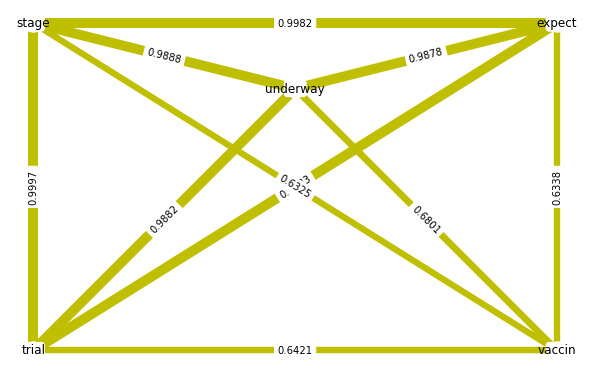

In [69]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig13.png')

### covid-psychology-small.txt

In [70]:
document_list,titles,word_count_psy=load_data("","covid-psychology-small.txt")

Number of words in text file : 39735
Total Number of Documents: 4481


In [71]:
clean_text=preprocess_data(document_list)

['international', 'sociology']
[]
['author']
['article', 'reuse', 'guidelines']
['sagepub', 'journals', 'permissions']
['0268580920948807']
['journals', 'sagepub']
['psychology', 'politics']
['covid', 'misinfodemics']
['people']
['believe', 'misinfodemics']
['sonia', 'mukhtar']
['university', 'management', 'technology', 'lahore', 'pakistan']
['abstract']
['misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse']
['health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate']
['evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects']
['misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier']
['about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article']
['review', 'examines', 'mechanisms', 'operational',

In [72]:
# LSA Model
number_of_topics=10
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))##dict and encoding matrix values

In [73]:
dict(model_psy.show_topic(0, topn=5))

{'pandem': 0.34921648049681425,
 'polici': 0.33208239404588324,
 'health': 0.2928859086271257,
 'covid': 0.26562518551097347,
 'impact': 0.24632587520583815}

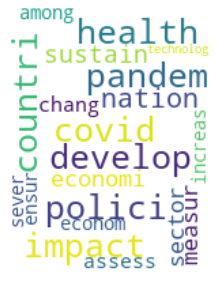

In [74]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph29.png')

In [75]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled14.png')

cosine-similarity
           pandem     polici     health      covid     impact
pandem          1  0.0931528 -0.0437214  0.0261854   0.175889
polici  0.0931528          1   0.119113 -0.0321232  0.0882534
health -0.0437214   0.119113          1 -0.0189841  -0.158998
covid   0.0261854 -0.0321232 -0.0189841          1  0.0826419
impact   0.175889  0.0882534  -0.158998  0.0826419          1


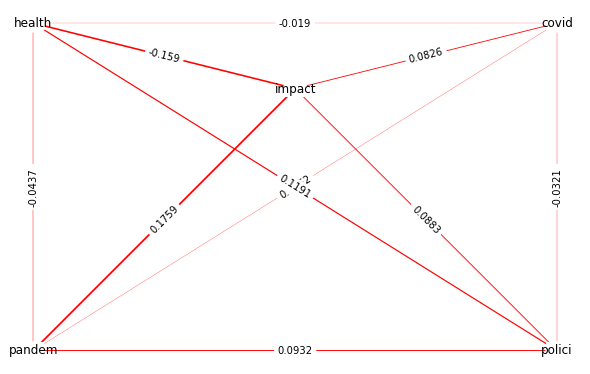

In [76]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig14.png')

In [77]:
mantel_test()

Pairwise-distance
           pandem     polici     health        covid     impact        model  \
pandem          0  0.0546542  0.0571453     0.902855  0.0452049     0.975346   
polici  0.0546542          0  0.0505646     0.953085  0.0194324      0.97327   
health  0.0571453  0.0505646          0     0.941872  0.0343659     0.979905   
covid    0.902855   0.953085   0.941872  1.49012e-08   0.943055      1.36184   
impact  0.0452049  0.0194324  0.0343659     0.943055          0     0.974727   
model    0.975346    0.97327   0.979905      1.36184   0.974727  1.49012e-08   
imag     0.955652   0.940756   0.947001      1.36973   0.945357      1.35715   
detect    0.31826   0.339477   0.342826     0.824787   0.334819      1.03248   
class    0.903058   0.893487   0.898907      1.30048   0.892139      1.32085   

            imag       detect     class  
pandem  0.955652      0.31826  0.903058  
polici  0.940756     0.339477  0.893487  
health  0.947001     0.342826  0.898907  
covid    1.36

(-0.32802748543651017, 0.84463, -0.9992144416196984)

In [78]:
mantel_test_n()

Pairwise-distance
               trial      vaccin      stage     expect underway        covid  \
trial              0  0.00219129   0.014962   0.011393        0     0.952892   
vaccin    0.00219129           0  0.0145251  0.0104146        0     0.951324   
stage       0.014962   0.0145251          0  0.0172429        0     0.949072   
expect      0.011393   0.0104146  0.0172429          0        0     0.950028   
underway           0           0          0          0        0            0   
covid       0.952892    0.951324   0.949072   0.950028        0  1.49012e-08   
model       0.972891    0.973122   0.971696   0.967681        0      1.36184   
imag        0.940652     0.94095   0.933354   0.942124        0      1.36973   
detect      0.339716    0.338016   0.339915   0.334943        0     0.824787   
class       0.893174     0.89409   0.893696   0.893089        0      1.30048   

                model      imag       detect     class  
trial        0.972891  0.940652     0.339716

(-0.04724988842649468, 0.56307, -0.17124815487482728)